### Muhamed Mustafa Muhamed ALi 
### Technocolabs Internship - Data Analysis - August 2022
### Reducing Traffic Mortality

#### 01 - Import Libraries

In [93]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### 02 - Read in and get an overview of the data

In [94]:
racc = pd.read_csv('road-accidents.csv',sep='|',skiprows=9)
mdriv = pd.read_csv('miles-driven.csv',sep='|')

#### 03 - Create a textual and a graphical summary of the data

In [95]:
df_prof = pp.ProfileReport(racc, title="Road Accedants and Miles Driven")
#df_prof

In [96]:
sns.set_theme(style="ticks")
#sns.pairplot(df)

#### 04 - Quantify the association of features and accidents

In [97]:
df_corr = df.corr()
df_corr

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,num_drvr_fatl_col
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942,-0.104819,-0.077133,0.119887
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066,-0.275927,-0.043199,-0.028740
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455,0.137171,-0.034561,0.009989
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000,-0.785773,-0.128928,-0.114040
cluster,-0.104819,-0.275927,0.137171,-0.785773,1.000000,0.011061,-0.012561
million_miles_annually,-0.077133,-0.043199,-0.034561,-0.128928,0.011061,1.000000,0.954478
num_drvr_fatl_col,0.119887,-0.028740,0.009989,-0.114040,-0.012561,0.954478,1.000000


#### 05 - Fit a multivariate linear regression

In [98]:
y = df.iloc[:,1:2]
X = df.iloc[:,2:5]

In [99]:
model = linear_model.LinearRegression().fit(X,y)

In [100]:
print(model.coef_)

[[-0.04180041  0.19086404  0.02473301]]


In [101]:
print(df_corr.iloc[:1,1:4])

                      perc_fatl_speed  perc_fatl_alcohol  perc_fatl_1st_time
drvr_fatl_col_bmiles         -0.02908           0.199426           -0.017942


#### 06 - Perform PCA on standardized data

In [102]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

In [103]:
pca = PCA()
pca.fit(X_transformed)

PCA()

([<matplotlib.axis.XTick at 0x2d6de53ea70>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

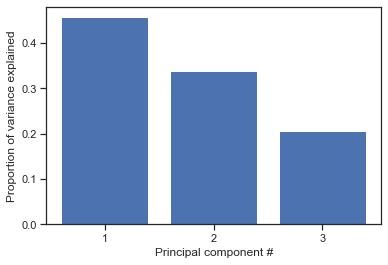

In [104]:
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

In [105]:
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal componenets is {}".format(two_first_comp_var_exp))

The cumulative variance of the first two principal componenets is 0.7946978608104824


#### 07 - Visualize the first two principal components

In [106]:
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X_transformed)

In [107]:
X_pca_1 = X_pca[:,:1]
X_pca_2 = X_pca[:,1:2]

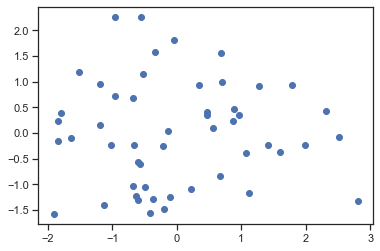

In [108]:
plt.scatter(X_pca_1,X_pca_2)

#### 08 - Find clusters of similar states in the data


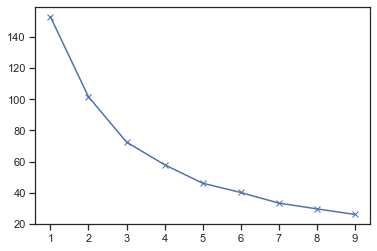

In [109]:
ks = range(1, 10)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_transformed)
    inertias.append(km.inertia_)
    
plt.plot(ks, inertias, marker='x')

#### 09 - KMeans to visualize clusters in the PCA scatter plot

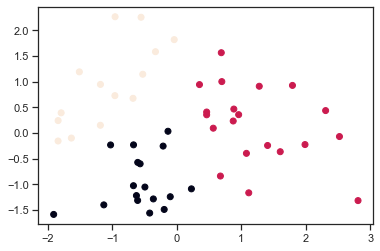

In [110]:
km = KMeans(n_clusters=3, random_state=0)
km.fit(X_transformed)
plt.scatter(X_pca[:,:1], X_pca[:,1:2], c=km.labels_)

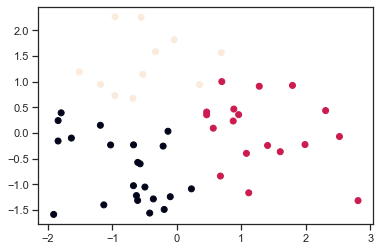

In [111]:
km = KMeans(n_clusters=3, random_state=0)
km.fit(X_pca)
plt.scatter(X_pca[:,:1], X_pca[:,1:2], c=km.labels_)

#### 10 - Visualize the feature differences between the clusters

<AxesSubplot:xlabel='percent', ylabel='measurement'>

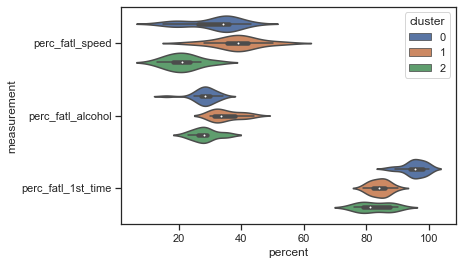

In [112]:
# Create a new column with the labels from the KMeans clustering
racc['cluster'] = km.labels_

melt_car = pd.melt(racc, id_vars='cluster', var_name='measurement', value_name='percent', value_vars=['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'])

sns.violinplot(y='measurement', x='percent', data=melt_car, hue='cluster')

#### 11 - Compute the number of accidents within each cluster

,count,mean,sum
cluster,,,
0,22,898.378595,19764.3291
1,18,911.406439,16405.3159
2,11,860.505945,9465.5654


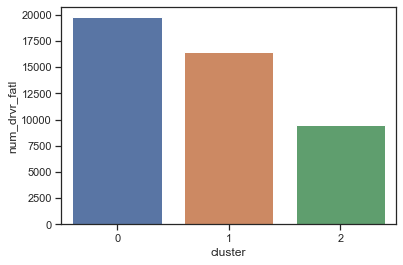

In [116]:
df = pd.merge(racc,mdriv,on='state')

df['num_drvr_fatl'] = df['million_miles_annually']*df['drvr_fatl_col_bmiles']/1000

sns.barplot(x='cluster', y='num_drvr_fatl', data=df, estimator=sum, ci=None)

count_mean_sum = df.groupby('cluster')['num_drvr_fatl'].agg(['count', 'mean', 'sum'])
count_mean_sum

#### 12 - Make a decision when there is no clear right choice

In [117]:
Cluster_Num = 1